In [2]:
#import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBRegressor

In [3]:
# Load training data from CSV
train_df = pd.read_csv('/content/drive/MyDrive/FBI - Time series Project/Test (2).csv')

# Load test data from Excel
test_df = pd.read_excel('/content/drive/MyDrive/FBI - Time series Project/Train.xlsx')

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

Train Shape: (162, 4)
Test Shape: (474565, 13)


In [4]:
# check column
print("Train DataFrame Columns:", train_df.columns)
print("Test DataFrame Columns:", test_df.columns)

Train DataFrame Columns: Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')
Test DataFrame Columns: Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')


In [5]:
# check if data is balanced/imbalanced
print(train_df['TYPE'].value_counts())

TYPE
Vehicle Collision or Pedestrian Struck (with Injury)    18
Theft of Vehicle                                        18
Theft of Bicycle                                        18
Theft from Vehicle                                      18
Other Theft                                             18
Offence Against a Person                                18
Mischief                                                18
Break and Enter Residential/Other                       18
Break and Enter Commercial                              18
Name: count, dtype: int64


In [6]:
# check missing values
print(train_df.isnull().sum())

YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


In [7]:
test_df.isnull().sum()

,0
TYPE,0
HUNDRED_BLOCK,13
NEIGHBOURHOOD,51491
X,0
Y,0
Latitude,0
Longitude,0
HOUR,49365
MINUTE,49365
YEAR,0


In [8]:
#check duplicate value
train_df.duplicated().sum()

np.int64(0)

In [9]:
test_df.duplicated().sum()

np.int64(44618)

In [10]:
test_df.drop_duplicates()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474560,Theft from Vehicle,E 28TH AVE / FRASER ST,Riley Park,493434.25,5454756.06,49.245542,-123.090211,19.0,0.0,2011,10,29,2011-10-29
474561,Theft from Vehicle,E 28TH AVE / FRASER ST,Riley Park,493434.25,5454756.06,49.245542,-123.090211,23.0,0.0,2011,3,9,2011-03-09
474562,Other Theft,23XX CAMBIE ST,Mount Pleasant,491656.42,5456901.55,49.264820,-123.114682,17.0,52.0,2011,2,10,2011-02-10
474563,Other Theft,7XX BUTE ST,West End,490797.66,5459282.31,49.286223,-123.126541,18.0,0.0,2011,12,20,2011-12-20


In [11]:
#column and datatype info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


In [12]:
#descriptive statistic
test_df.describe()

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


In [13]:
test_df.nunique()

,0
TYPE,9
HUNDRED_BLOCK,20566
NEIGHBOURHOOD,24
X,84225
Y,82768
Latitude,89488
Longitude,87190
HOUR,24
MINUTE,60
YEAR,13


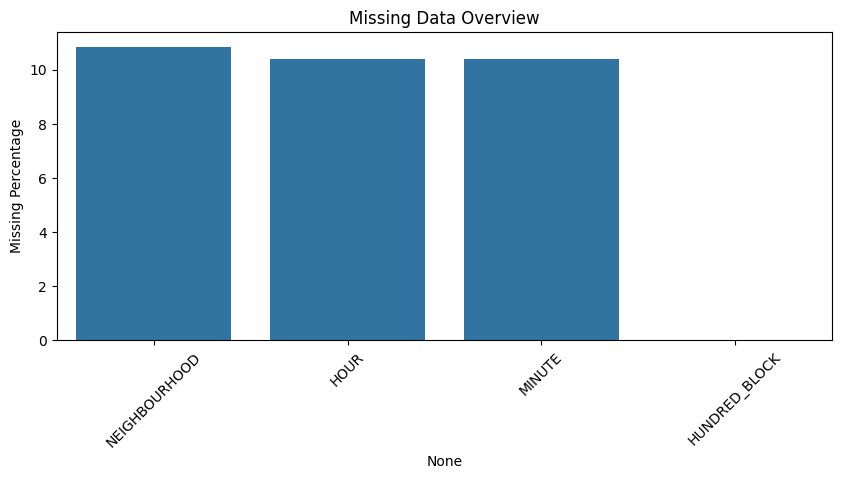

In [14]:
#To see which columns have missing values.
#Missing data can affect analysis and model performance
missing = test_df.isnull().mean().sort_values(ascending=False) * 100
missing = missing[missing > 0]

plt.figure(figsize=(10, 4))
sns.barplot(x=missing.index, y=missing.values)
plt.ylabel("Missing Percentage")
plt.title("Missing Data Overview")
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-457a62582263>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_types.index, x=top_types.values, palette='Reds_r')


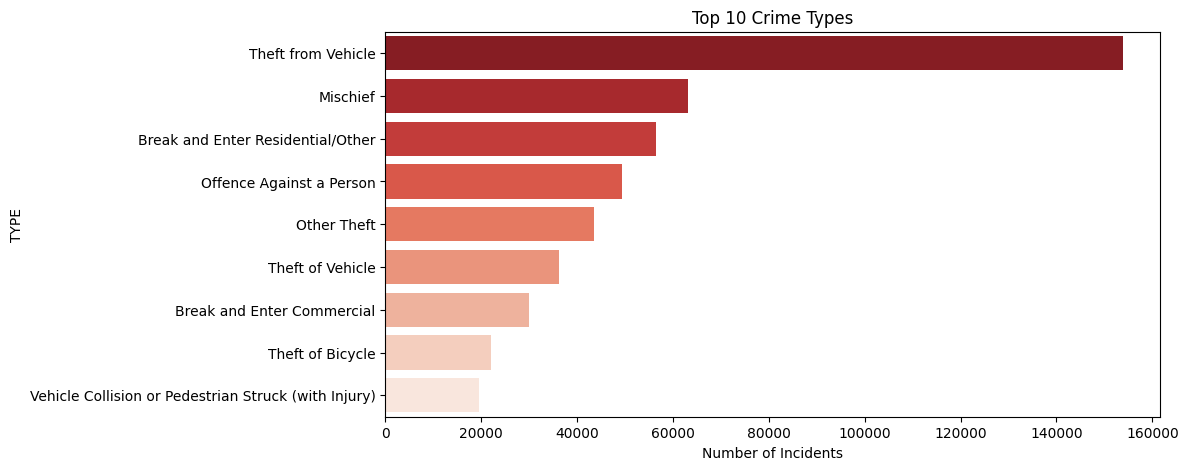

In [15]:
#types of crimes happen most frequently
top_types = test_df['TYPE'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=top_types.index, x=top_types.values, palette='Reds_r')
plt.xlabel("Number of Incidents")
plt.title("Top 10 Crime Types")
plt.show()

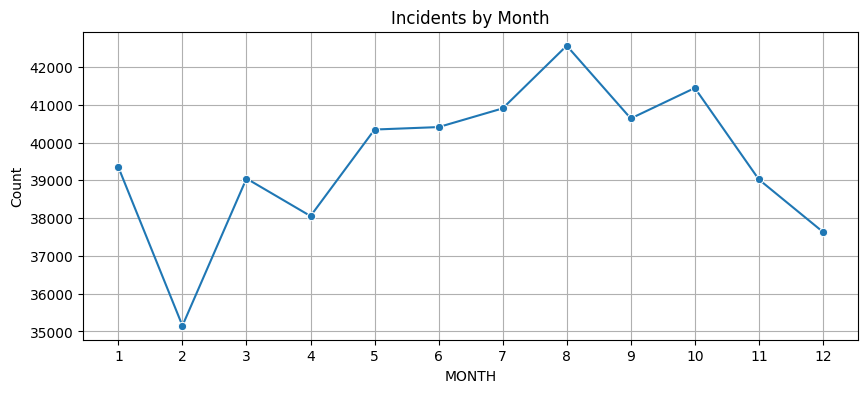

In [16]:
#how crime changes throughout the year.
monthly_trend = test_df.groupby('MONTH').size()

plt.figure(figsize=(10, 4))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o')
plt.title("Incidents by Month")
plt.xticks(range(1, 13))
plt.ylabel("Count")
plt.grid()
plt.show()

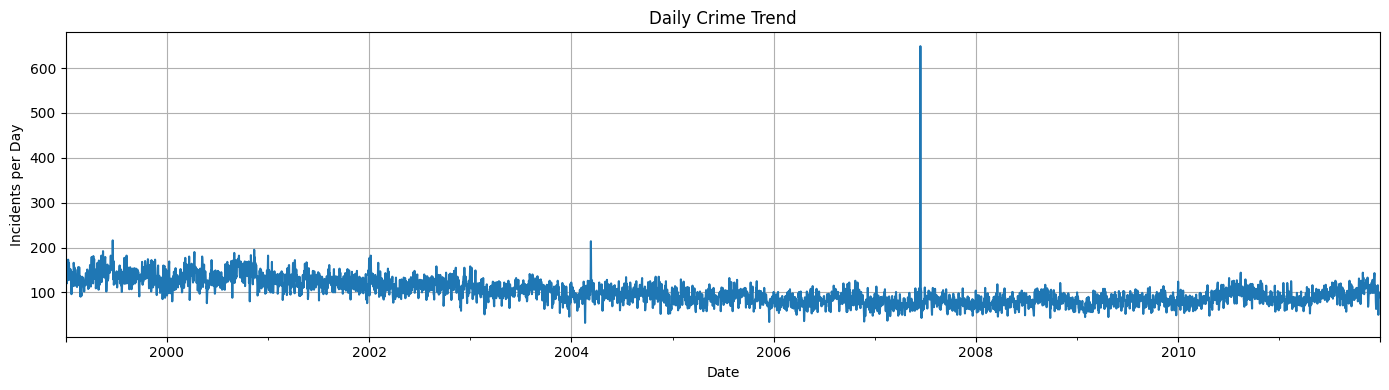

In [17]:
#long-term trends, like rising or falling crime
daily_trend = test_df.groupby('Date').size()

plt.figure(figsize=(14, 4))
daily_trend.plot()
plt.title("Daily Crime Trend")
plt.ylabel("Incidents per Day")
plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-18-2845fd920c32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df.dropna(subset=['HOUR']), x='HOUR', palette='coolwarm')


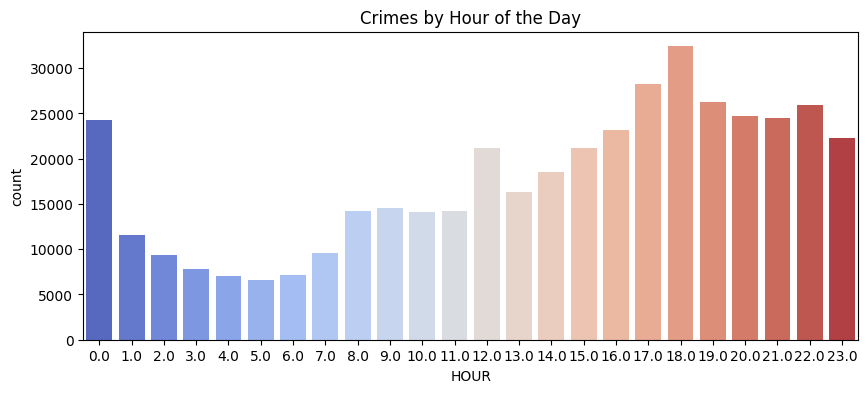

In [18]:
# what time crimes mostly occur
plt.figure(figsize=(10, 4))
sns.countplot(data=test_df.dropna(subset=['HOUR']), x='HOUR', palette='coolwarm')
plt.title("Crimes by Hour of the Day")
plt.show()

<ipython-input-19-84e42b2554c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_neighbourhoods.index, x=top_neighbourhoods.values, palette='viridis')


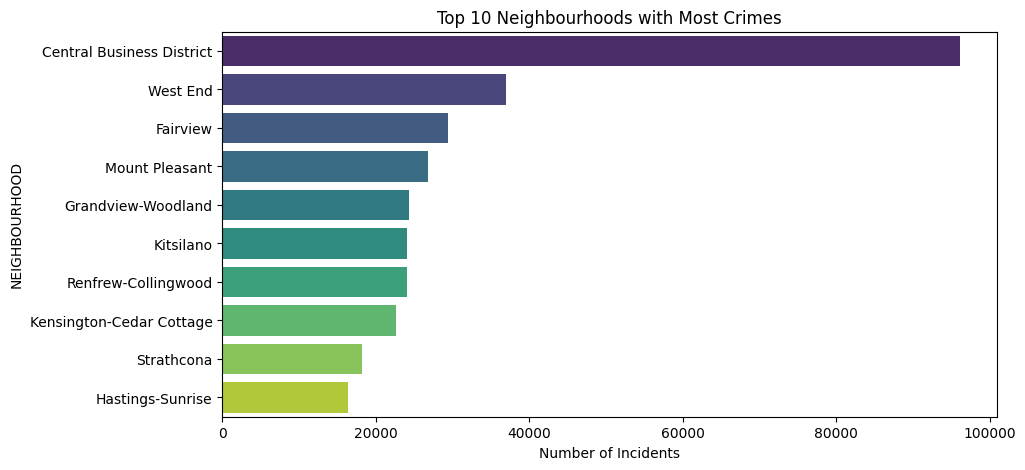

In [19]:
#where crimes are happening most
top_neighbourhoods = test_df['NEIGHBOURHOOD'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=top_neighbourhoods.index, x=top_neighbourhoods.values, palette='viridis')
plt.xlabel("Number of Incidents")
plt.title("Top 10 Neighbourhoods with Most Crimes")
plt.show()

In [20]:
# 1. Group by YEAR, MONTH, TYPE to count incidents
train_df = test_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident_Counts')

# 2. Encode 'TYPE' for modeling
le = LabelEncoder()
train_df['TYPE_ENCODED'] = le.fit_transform(train_df['TYPE'])

# 3. Define features (X) and label (y)
X_train = train_df[['YEAR', 'MONTH', 'TYPE_ENCODED']]
y_train = train_df['Incident_Counts']

# 4. Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 5. Train model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [21]:
features = ['YEAR', 'MONTH', 'TYPE_ENCODED']
target = 'Incident_Counts'

X = train_df[features]
y = train_df[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 34.18
MSE: 2941.50
RMSE: 54.24
R² Score: 0.96


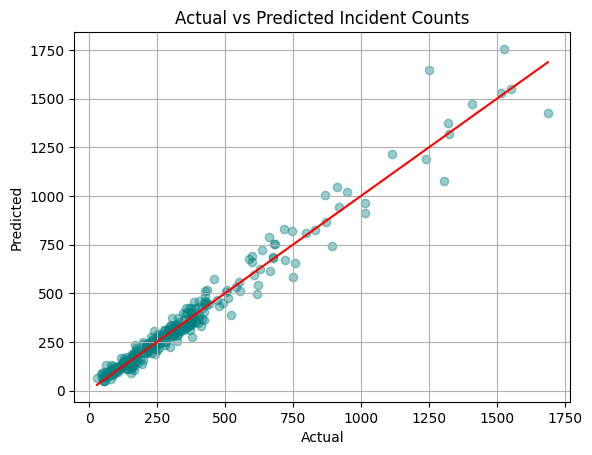

In [26]:
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Incident Counts")
plt.grid(True)
plt.show()

In [ ]:
print(train_df['TYPE'].unique())

['Break and Enter Commercial' 'Break and Enter Residential/Other'
 'Mischief' 'Offence Against a Person' 'Other Theft' 'Theft from Vehicle'
 'Theft of Bicycle' 'Theft of Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Injury)']


In [ ]:
# Prepare prediction data
future_data = pd.DataFrame({
    'YEAR': [2026],
    'MONTH': [6],
    'TYPE': ['Offence Against a Person']  # Example
})

# Encode and scale
future_data['TYPE_ENCODED'] = le.transform(future_data['TYPE'])
X_future = future_data[['YEAR', 'MONTH', 'TYPE_ENCODED']]
X_future_scaled = scaler.transform(X_future)

# Predict
y_pred = model.predict(X_future_scaled)
print(f"Predicted Incident Count: {y_pred[0]:.2f}")